# Production Structure

Poduction Function creates a grid with the production structure of all tenure workers  
It fits a Polynomial going through the starting production, peak production and last production

### Input Vairables:

$G$ Max number of tenure workers  
$F_0$ Starting Production  
$F_G$ Last Tenure Production  
$\hat{F}$ Peak Production  
$\hat{G}$ Tenure of Peak Production

### Output Variables:

$\mathbb{F}$ Grid with Production of each Tenure worker

## Function:

In [1]:
function Production(G::Int,F0::Float64,FG::Float64,FK::Float64,GK::Int)
    
    """Create the Wage Structure of an Economy.
    It fits a second order polynomial for the three parameter values
    and extrapolates for the rest of the tenure values.

    Parameters
    ----------
    G : Max Number of Tenure Workers
    F0: Starting Production 
    FG: Last Tenure Production
    FK: Peak Production
    GK: Tenure of Peak Production
    
    Output
    ----------
    F : Grid with Production of each Tenure worker
    """
    
    V=ones(3,3);
    V[:,2]=[1,GK,G];
    V[:,1]=[1,GK^2,G^2];
    
    Y=[F0,FK,FG];
    
    Coef=V\Y;
    
    TGrid=[1:G];
    
    F=ones(G,1)*Coef[3];
    F+=TGrid*Coef[2];
    F+=TGrid.^2*Coef[1];
    
    return collect(F)
    
end

Production (generic function with 1 method)

## Example

### Parameters:

In [2]:
G=10;
F_0=0.8;
F_G=1.0;
F̂=1.2;
Ĝ=6;

In [3]:
FStructure=Production(G,F_0,F_G,F̂,Ĝ);

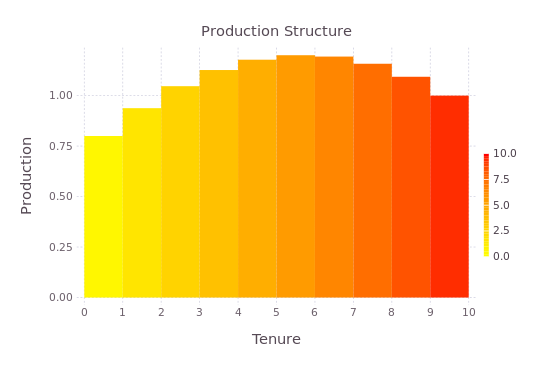

In [5]:
import DisplayDP

DisplayDP.Production(FStructure,colour=["yellow","orange","red"])